# Analyze Twitch Gaming Data
In this project, I will visualize Twitch data using Python and Matplotlib, in the forms of:

- Bar Graph: Featured Games
- Pie Chart: Stream Viewers’ Locations
- Line Graph: Time Series Analysis

In [250]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## Bar Graph: Featured Games

Twitch’s home page has a Featured Games section where it lists the “Games people are watching now”.

If I queried the Twitch practice dataset using SQL, I would get back the following list of the top 10 trending games (on January 1st, 2015) and their number of viewers.

Next, I will present the findings using a bar graph.

In [251]:
chat_df = pd.read_csv('chat.csv')
chat_df.head()

,time,device_id,login,channel,country,player,game
0,2015-01-01 18:45:50,70e2b95b5ac0d4c227e46966658d16b3e044996e,5c2f5c1f19a7738e16ed0be551d865e8a8fce71d,jerry,BY,NaN,Dota 2
1,2015-01-01 01:16:57,f2b9065b55fd80d6aa653ce989b489f4ec5198be,0d77740e4fb5ce77d94f9f6c8ef1f762990d0344,elaine,HK,NaN,Devil May Cry 4: Special Edition
2,2015-01-01 16:22:10,d448ba963d7e1023dd1b0a40b95d4f6611750692,77ab14c1fb815e1c369ba0cf7d4c56b4fe489997,frank,GB,iphone_t,League of Legends
3,2015-01-01 03:58:13,8d6823dc52b400b50aebf269bf1f03a36d19eeaa,91cb88c0743761589273fc5e800e7743ece46494,frank,US,iphone_t,League of Legends
4,2015-01-01 11:47:35,16c1e39594d62358d27ae604ad43a071f0d86bc4,51a9234f83d656607cfd7f26690c12d2ffbce353,estelle,DE,NaN,Dota 2


In [252]:
chat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148562 entries, 0 to 148561
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   time       148562 non-null  object
 1   device_id  148560 non-null  object
 2   login      148562 non-null  object
 3   channel    148562 non-null  object
 4   country    142641 non-null  object
 5   player     37536 non-null   object
 6   game       148221 non-null  object
dtypes: object(7)
memory usage: 7.9+ MB


In [253]:
stream_df = pd.read_csv('stream.csv')
stream_df.head()

,time,device_id,login,channel,country,player,game,stream_format,subscriber
0,2015-01-01 18:33:52,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends,NaN,NaN
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,False
2,2015-01-01 04:39:38,2f9c3f9ee1033b71a3819564243f20ef3bec0183,5b9a43e68f019185f55615d0b83019dee4b5d06f,frank,US,site,League of Legends,chunked,False
3,2015-01-01 11:15:30,0cda8226ba2583424c80c3c1c22c1256b080ad17,02c7797faa4d8a3ff4b0c14ee1764b6817b53d0b,estelle,CH,site,Dota 2,high,False
4,2015-01-01 11:28:19,e3288ca5e3153aa85e32f64cdd994b7666968dcf,b920c228acbcbebee26d9c79f6eb73b73a9480c7,morty,FR,site,Heroes of the Storm,medium,False


In [254]:
stream_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526299 entries, 0 to 526298
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   time           526299 non-null  object
 1   device_id      526271 non-null  object
 2   login          526299 non-null  object
 3   channel        526299 non-null  object
 4   country        509135 non-null  object
 5   player         526299 non-null  object
 6   game           523175 non-null  object
 7   stream_format  267332 non-null  object
 8   subscriber     273814 non-null  object
dtypes: object(9)
memory usage: 36.1+ MB


In [255]:
# What are the most popular games in the stream table?
top_10 = stream_df['game'].value_counts().rename_axis('games').to_frame('counts').reset_index().head(n=10)
top_10

,games,counts
0,League of Legends,193533
1,Dota 2,85608
2,Counter-Strike: Global Offensive,54438
3,DayZ,38004
4,Heroes of the Storm,35310
5,The Binding of Isaac: Rebirth,29467
6,Gaming Talk Shows,28115
7,World of Tanks,15932
8,Hearthstone: Heroes of Warcraft,14399
9,Agar.io,11480


In [256]:
#  convert top 10 to list of games and number of views
games = []
viewers = []
for idx, row in top_10.iterrows():
    games.append(row['games'])
    viewers.append(row['counts'])
print(games)
print(viewers)

['League of Legends', 'Dota 2', 'Counter-Strike: Global Offensive', 'DayZ', 'Heroes of the Storm', 'The Binding of Isaac: Rebirth', 'Gaming Talk Shows', 'World of Tanks', 'Hearthstone: Heroes of Warcraft', 'Agar.io']
[193533, 85608, 54438, 38004, 35310, 29467, 28115, 15932, 14399, 11480]


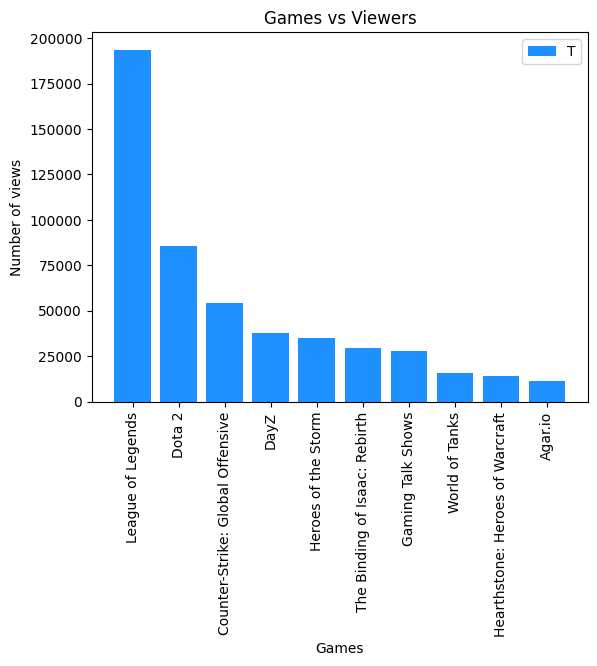

<Figure size 640x480 with 0 Axes>

In [257]:
# plot a bar graph showing the games vs viewers
plt.bar(range(len(games)), viewers, color= 'dodgerblue')
plt.title('Games vs Viewers')
plt.legend('Twitch')
plt.xlabel('Games')
plt.ylabel('Number of views')
# adding ticks
ax = plt.subplot()
ax.set_xticks(range(0,10))
ax.set_xticklabels(games, rotation=90)
plt.show()

# We can add plt.clf() to clear the current figure, our bar graph, before creating our next figure, the pie chart
 
plt.clf()

The graph clearly shows that League of Legends really dominated the list on January 1st, 2015!

There are 193533 League of Legends viewers from this dataset. Where are they coming from?

## Pie Chart: League of Legends Viewers' Whereabouts

My next task is to find the top 10 countries that are contributing to the viewings for the Land of Legends and present the findings using a pie chart. 

In [258]:
# get a table shows the top 10 countries 
LoL_data = stream_df[stream_df['game'] == 'League of Legends']
# LoL_data
LoL_data = LoL_data['country'].value_counts().rename_axis('country labels').to_frame('counts').reset_index()
LoL_data = LoL_data.head(10)
LoL_data

,country labels,counts
0,US,85606
1,CA,13034
2,DE,10835
3,GB,6964
4,TR,4412
5,AU,3911
6,SE,3533
7,NL,3213
8,DK,2909
9,GR,2885


In [259]:
# create 2 list of the countries and the counts
labels = []
countries = []
for idx, row in LoL_data.iterrows():
    labels.append(row['country labels'])
    countries.append(row['counts'])
print(labels)    
print(countries)

['US', 'CA', 'DE', 'GB', 'TR', 'AU', 'SE', 'NL', 'DK', 'GR']
[85606, 13034, 10835, 6964, 4412, 3911, 3533, 3213, 2909, 2885]


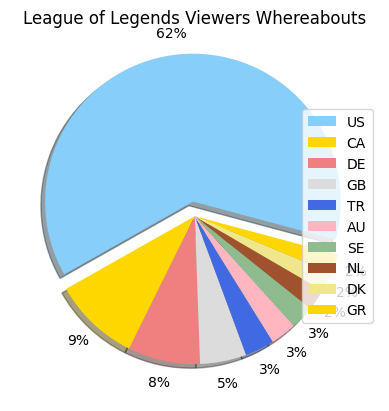

<Figure size 640x480 with 0 Axes>

In [260]:
# plot pie chart 
colors = ['lightskyblue', 'gold', 'lightcoral', 'gainsboro', 'royalblue', 'lightpink', 'darkseagreen', 'sienna', 'khaki', 'gold', 'violet', 'yellowgreen']

explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

plt.pie(countries, explode=explode, colors=colors, shadow=True, startangle=345, autopct='%1.0f%%', pctdistance=1.15)
plt.title('League of Legends Viewers Whereabouts')
plt.legend(labels, loc='right')
plt.show()

plt.clf()

In [261]:
stream_df.head()

,time,device_id,login,channel,country,player,game,stream_format,subscriber
0,2015-01-01 18:33:52,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends,NaN,NaN
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,False
2,2015-01-01 04:39:38,2f9c3f9ee1033b71a3819564243f20ef3bec0183,5b9a43e68f019185f55615d0b83019dee4b5d06f,frank,US,site,League of Legends,chunked,False
3,2015-01-01 11:15:30,0cda8226ba2583424c80c3c1c22c1256b080ad17,02c7797faa4d8a3ff4b0c14ee1764b6817b53d0b,estelle,CH,site,Dota 2,high,False
4,2015-01-01 11:28:19,e3288ca5e3153aa85e32f64cdd994b7666968dcf,b920c228acbcbebee26d9c79f6eb73b73a9480c7,morty,FR,site,Heroes of the Storm,medium,False


The pie chart shows that most of the viewings are coming from the United States which contribute to 62% of the LoL viewings.

## Line Graph: Time Series Analysis

My next task is to find the number of US viewers at different hours of the day on January 1st, 2015. I will present these finding using a line graph.

So I'll need to extract the hours from the time column to get the number of viewings per hour.

In [262]:
# split the time column into date and time columns and extract hours
loc_split = stream_df['time'].str.split(pat = ' ', expand=True)
stream_df['date'] = loc_split[0]
stream_df['time'] = loc_split[1]

time_split = stream_df['time'].str.split(pat = ':', expand=True)
stream_df['hours'] = time_split[0]

LoL_US_data = stream_df[(stream_df['game'] == 'League of Legends') & (stream_df['country'] == 'US')]
LoL_US_data

,time,device_id,login,channel,country,player,game,stream_format,subscriber,date,hours
0,18:33:52,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends,NaN,NaN,2015-01-01,18
2,04:39:38,2f9c3f9ee1033b71a3819564243f20ef3bec0183,5b9a43e68f019185f55615d0b83019dee4b5d06f,frank,US,site,League of Legends,chunked,False,2015-01-01,04
6,21:09:23,80a0c7d1abb6a5a0060e18202b77bef831e08ca5,eb158cab3f606d3894a32e20bddbfd2d589095a9,frank,US,site,League of Legends,high,True,2015-01-01,21
9,22:00:14,593ed161c456eeeb9e18b8005786d42abc1a7373,ef24dc49ceb4bcd3cccb0fa862d8a150ecf935e1,frank,US,site,League of Legends,medium,False,2015-01-01,22
11,22:59:56,1a247324beabdb85b2b8a97472f28f6cf9026fe1,c485d2914068876ebd6cf3ee6812dc939abae8d7,frank,US,android,League of Legends,NaN,NaN,2015-01-01,22
...,...,...,...,...,...,...,...,...,...,...,...
526269,03:53:44,4339f80a6c3ba57ada6f2670e6d133d60b026068,522248f016d94ae71d010dd28b75604b7e0a01ac,frank,US,site,League of Legends,high,False,2015-01-01,03
526282,20:38:30,2889c9b18eff55153247dedaf58199c77c6a2fd2,b62f88d164168e1b1bb41bb60dce31296cd7f431,frank,US,android,League of Legends,NaN,NaN,2015-01-01,20
526288,02:26:56,00d49a012d7d54066ce861bc00c144aeee3d1811,2224c6356a3d74a872e7319a63154ff95bc91b24,frank,US,iphone_t,League of Legends,NaN,NaN,2015-01-01,02
526289,22:30:52,94ebb7d5d3dbda1128ab40ea4c550540410c1ea0,883b1f98fd38e24da1c78511de333f8dd081928b,frank,US,ipad_t,League of Legends,NaN,NaN,2015-01-01,22


In [263]:
hours_count = LoL_US_data['hours'].value_counts().rename_axis('hours').to_frame('counts').reset_index()
hours_count = hours_count.sort_values(by='hours')

viewers_hours = [row['counts'] for idx, row in hours_count.iterrows()]
hours = list(map(int, [row['hours'] for idx, row in hours_count.iterrows()]))
print(viewers_hours)
print(hours)

[6709, 4465, 5762, 4099, 3427, 1477, 74, 115, 128, 132, 125, 160, 167, 164, 146, 2895, 5828, 6248, 5932, 6030, 7826, 11344, 6703, 5650]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [264]:
# to account for 15% error in the viewers_hour data due to uncertainty that some people leave their browsers open
y_upper = [1.15* x for x in viewers_hours]
y_lower = [0.85* x for x in viewers_hours]

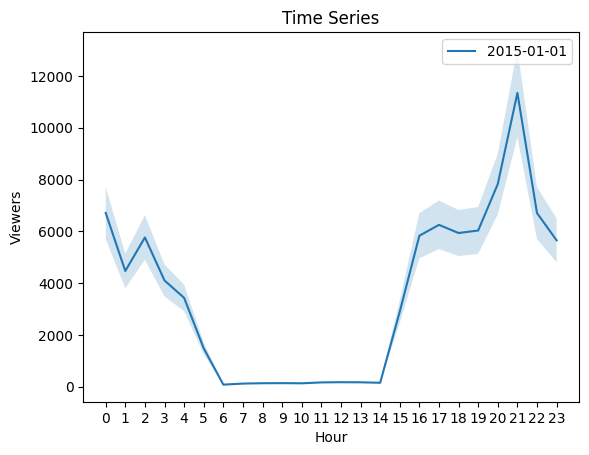

In [265]:
# plot line to show time series
plt.plot(hour, viewers_hours)
plt.title('Time Series')
plt.fill_between(hour, y_upper, y_lower, alpha=0.2)
plt.legend(['2015-01-01'])
plt.xlabel('Hour')
plt.ylabel('Viewers')
ax = plt.subplot()
ax.set_xticks(hour)
plt.show()

The line graph shows that there's peak in views at 9PM for US viewers.